In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/data/Fluo4/8-12-16/Ar fluo4-BAPTA2

/Users/austinmcdonald/Desktop/data/Fluo4/8-12-16/Ar Fluo4-BAPTA2


In [3]:
os.listdir()

['BAPTA-0.csv',
 'BAPTA-1.csv',
 'BAPTA-10.csv',
 'BAPTA-2.csv',
 'BAPTA-20.csv',
 'BAPTA-3.csv',
 'BAPTA-4.csv',
 'BAPTA-5.csv',
 'BAPTA-6.csv',
 'BAPTA-8.csv',
 'info.txt']

In [4]:
#backg = pd.read_csv('CCD-noise.csv',delimiter=",",names = ['wave','back'],skiprows=33,skipfooter=1,engine='python')
bapta0 = pd.read_csv('BAPTA-0.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bapta1 = pd.read_csv('BAPTA-1.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bapta2 = pd.read_csv('BAPTA-2.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bapta3 = pd.read_csv('BAPTA-3.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bapta4 = pd.read_csv('BAPTA-4.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bapta5 = pd.read_csv('BAPTA-5.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bapta6 = pd.read_csv('BAPTA-6.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bapta8 = pd.read_csv('BAPTA-8.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bapta10 = pd.read_csv('BAPTA-10.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
bapta20 = pd.read_csv('BAPTA-20.csv',delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')


In [6]:
bapta0['dif'] = bapta0['sig'].diff().abs()
bapta0['BS'] = bapta0['sig']-backg['back']

bapta50['dif'] = bapta50['sig'].diff().abs()
bapta50['BS'] = bapta50['sig']-backg['back']

bapta100['dif'] = bapta100['sig'].diff().abs()
bapta100['BS'] = bapta100['sig']-backg['back']

bapta150['dif'] = bapta150['sig'].diff().abs()
bapta150['BS'] = bapta150['sig']-backg['back']


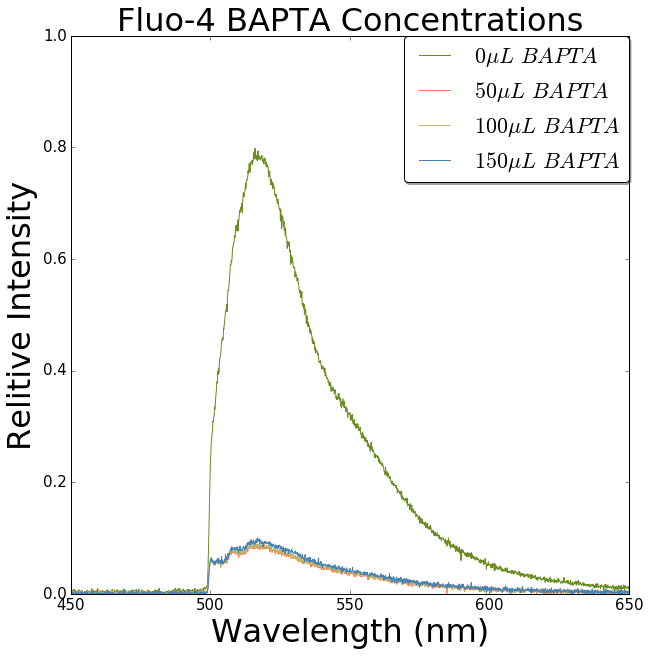

In [13]:
plt.figure(figsize=(10,10))

bapta0f = bapta0[bapta0['dif']<.1]
bapta150f = bapta150[bapta150['dif']<.1]
bapta50f = bapta50[bapta50['dif']<.1]
bapta100f = bapta100[bapta100['dif']<.1]



plt.plot(bapta0f['wave'],bapta0f['BS'],color='olivedrab',label=r'$0 \mu L$ $BAPTA$')
plt.plot(bapta50f['wave'],bapta50f['BS'],color='coral',label=r'$50 \mu L$ $BAPTA$')
plt.plot(bapta100f['wave'],bapta100f['BS'],color='darkkhaki',label=r'$100 \mu L$ $BAPTA$')
plt.plot(bapta150f['wave'],bapta150f['BS'],color='steelblue',label=r'$150 \mu L$ $BAPTA$')

#plt.text(600, .65, r'$\frac{F_{max}}{F_{min}} = 12.57$', fontsize=25)

plt.xlabel('Wavelength (nm)', fontsize=32)
plt.ylabel('Relitive Intensity', fontsize=32)
plt.title('Fluo-4 BAPTA Concentrations', fontsize=32)
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlim(450,650)
plt.ylim(0,1)
#plt.savefig('Ar_Fluo4_BAPTA.pdf')

plt.show()

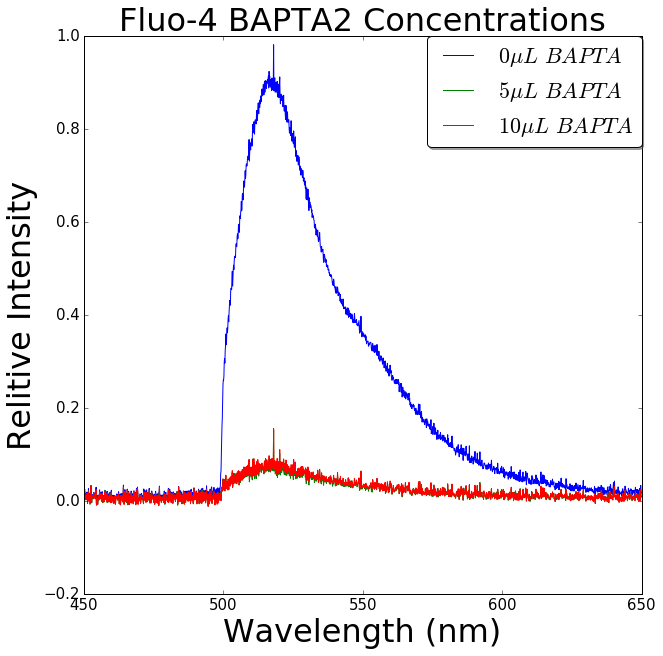

In [12]:
plt.figure(figsize=(10,10))

plt.plot(bapta0['wave'],bapta0['sig']*(500/500),label=r'$0 \mu L$ $BAPTA$')
plt.plot(bapta1['wave'],bapta1['sig']*(505/500),label=r'$5 \mu L$ $BAPTA$')
plt.plot(bapta2['wave'],bapta2['sig']*(510/500),label=r'$10 \mu L$ $BAPTA$')
#plt.plot(bapta3['wave'],bapta3['sig']*(515/500),label=r'$15 \mu L$ $BAPTA$')
#plt.plot(bapta4['wave'],bapta4['sig']*(520/500),label=r'$20 \mu L$ $BAPTA$')
#plt.plot(bapta5['wave'],bapta5['sig']*(525/500),label=r'$25 \mu L$ $BAPTA$')
#plt.plot(bapta6['wave'],bapta6['sig']*(530/500),label=r'$30 \mu L$ $BAPTA$')
#plt.plot(bapta8['wave'],bapta8['sig']*(540/500),label=r'$40 \mu L$ $BAPTA$')
#plt.plot(bapta10['wave'],bapta10['sig']*(550/500),label=r'$50 \mu L$ $BAPTA$')
#plt.plot(bapta20['wave'],bapta20['sig']*(600/500),label=r'$100 \mu L$ $BAPTA$')



#plt.text(600, .65, r'$\frac{F_{max}}{F_{min}} = 12.57$', fontsize=25)

plt.xlabel('Wavelength (nm)', fontsize=32)
plt.ylabel('Relitive Intensity', fontsize=32)
plt.title('Fluo-4 BAPTA2 Concentrations', fontsize=32)
plt.legend(bbox_to_anchor=(1,1), loc=1, borderaxespad=0.,fontsize=22,shadow=True, fancybox=True)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlim(450,650)
#plt.ylim(0,.1)
#plt.savefig('Ar_Fluo4_BAPTA.pdf')

plt.show()